## RANDOM FOREST REGRESSION on Diabetes Dataset

In [39]:
#basic imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [40]:
# algo and estimators
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [41]:
diabetes = load_diabetes()

In [42]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [43]:
x = diabetes.feature_names
x

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [44]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [45]:
print(diabetes.get('DESCR'))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [47]:
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes = x.copy()
df_diabetes['disease_progress'] = y
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
feature_scalar = StandardScaler()
x = feature_scalar.fit_transform(x)

In [50]:
trainx, testx, trainy, testy = train_test_split(x,y,test_size= .2, random_state=0)

In [63]:
model = RandomForestRegressor(n_estimators=70, n_jobs=-1, random_state=0)
model.fit(trainx,trainy)

RandomForestRegressor(n_estimators=70, n_jobs=-1, random_state=0)

In [64]:
model.score(testx,testy)*100

28.321163628332325

In [65]:
model.score(x,y)*100

81.23075918738455

In [66]:
ypred = model.predict(x)

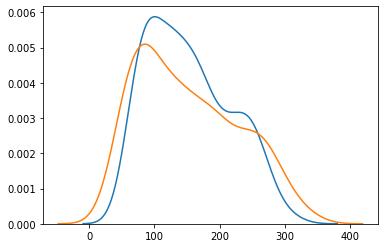

In [55]:
sns.distplot(ypred, hist=False)
sns.distplot(y,hist=False)
plt.show()

In [71]:
def save_model(path, model):
    with open(path,'wb') as f:
        pickle.dump(model, f)
    return path

def load_model(path):
    with open(path,'rb') as f:
        return pickle.load(f)

In [72]:
save_model('../../models/rfr_diabetes_model.pkl',model)

'../../models/rfr_diabetes_predictor.pkl'

In [73]:
save_model('../../models/rfr_feature_scaler_diabetes.pkl',feature_scalar)

'../../models/rfr_feature_scaler_diabetes.pkl'